# All Acquisition Data Analysis

We first put together all of the `Acquisition` datasets.

In [3]:
import pandas as pd
from os import listdir
from os.path import join
from tqdm import tqdm
import matplotlib.pyplot as plt


In [4]:
AcquisitionColumnNames = (
    "LOAN_ID", "ORIG_CHN", "Seller.Name", 
    "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", 
    "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", 
    "PROP_TYP", "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", 
    "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", 
    "RELOCATION_FLG"
)

In [5]:
base_path = "/home/capcolabs/data/FannieMae"

all_acq = join(base_path, "Acquisition_All")

files = [
    join(all_acq, f) for f in listdir(all_acq)
]

We create dataframes for all of the files and create a column in each `QUARTER` which is the combined `YEAR` and `QUARTER`

In [4]:
DFS = []

for file in tqdm(files):
    df = pd.read_csv(
        file,
        names=AcquisitionColumnNames,
        header=None,
        sep="|"
    )
    df['QUARTER'] = file.split("/")[-1].replace(".txt","").split("_")[-1]
    DFS.append(df)

100%|██████████| 75/75 [00:51<00:00,  1.46it/s]


In [5]:
df = pd.concat(DFS)

In [6]:
df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG', 'QUARTER'],
      dtype='object')

In [7]:
df['ORIG_DTE'] = pd.to_datetime(df["ORIG_DTE"])

## Getting Monthly Data

We will group by the `ORIG_DTE` and use this to get the various descriptive statistics for our dataset.

In [8]:
loans = performance_df.groupby("LOAN_ID", sort=True)['Delq.Status'].max()

ID_To_Delinq = {}

for row in loans.iteritems():
    loan_id, delinq = row
    ID_To_Delinq[loan_id] = delinq

NameError: name 'performance_df' is not defined

In [9]:
credit_score_mean = df.groupby("ORIG_DTE", sort=True)['CSCORE_B'].mean()


In [12]:
credit_score_std = df.groupby("ORIG_DTE", sort=True)['CSCORE_B'].std()

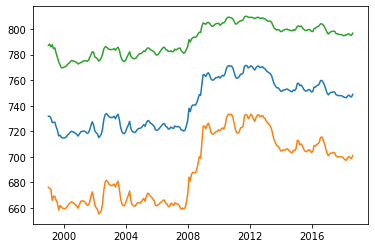

In [15]:
plt.plot(credit_score)
plt.plot(credit_score - credit_score_std)
plt.plot(credit_score + credit_score_std)

In [16]:
oltv = df.groupby("ORIG_DTE", sort=True)['OLTV'].mean()
oltv_std = df.groupby("ORIG_DTE", sort=True)['OLTV'].std()

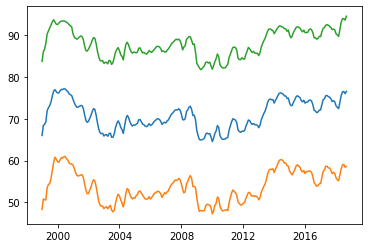

In [17]:
plt.plot(oltv)
plt.plot(oltv - oltv_std)
plt.plot(oltv + oltv_std)

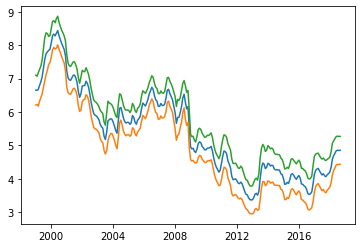

In [20]:
orate = df.groupby("ORIG_DTE", sort=True)['ORIG_RT'].mean()
orate_std = df.groupby("ORIG_DTE", sort=True)['ORIG_RT'].std()

plt.plot(orate)
plt.plot(orate - orate_std)
plt.plot(orate + orate_std)

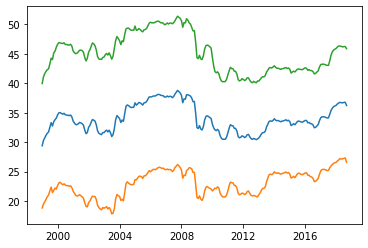

In [21]:
dti = df.groupby("ORIG_DTE", sort=True)['DTI'].mean()
dti_std = df.groupby("ORIG_DTE", sort=True)['DTI'].std()

plt.plot(dti)
plt.plot(dti - dti_std)
plt.plot(dti + dti_std)

# Analyzing the Performance Set

In [6]:
base_path = "/home/capcolabs/data/FannieMae"

all_acq = join(base_path, "Performance_All")

files = [
    join(all_acq, f) for f in listdir(all_acq)
]

print(f'There are {len(files)} Performance Files!')

There are 75 Performance Files!


In [7]:
PerformanceColumnNames = (
    "LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", 
    "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
    "Adj.Month.To.Mat", "Maturity.Date", "MSA", 
    "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
    "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", 
    "FCC_COST", "PP_COST", "AR_COST", "IE_COST", 
    "TAX_COST", "NS_PROCS","CE_PROCS", "RMW_PROCS", 
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", 
    "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
)

In [8]:
from sqlalchemy import create_engine

engine = create_engine('postgres://postgres@localhost:5432', echo=False)

In [ ]:
DFS = []

FCC = {}

for file in tqdm(files):
    pf = pd.read_csv(
        file,
        names=PerformanceColumnNames,
        header=None,
        sep="|"
    )
    pf['QUARTER'] = file.split("/")[-1].replace(".txt","").split("_")[-1]
    
    pf.to_sql('performance', con=engine, if_exists='append')
    

  0%|          | 0/75 [00:00<?, ?it/s]